In [47]:
import pandas as pd
import numpy as np
df_athletes = pd.read_csv("Data/athletesWomenGames2019.csv",sep=';',na_values = ['--']);
df_athletes.drop(['CountryCode','RegionalName','RegionName','RegionCode','RegionalCode','Rn5k'],axis=1,inplace=True);

In [48]:
df_athletes.dropna(how = 'all', subset = ['CleanAndJerk_kg','Snatch_kg','DeadLift_kg','FightGoneBad','MaxPullUps','Fran','Grace','Helen','Filthy50','Sprint400m'],inplace = True)

In [49]:
df_athletes[df_athletes['Height_cm']<140]

,CompetitorId,CompetitorName,FirstName,LastName,Gender,Age,RegionId,Profession,Height_cm,Weight_kg,...,CleanAndJerk_kg,Snatch_kg,DeadLift_kg,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
25,488881,MariaNive Clark,MariaNive,Clark,F,37,0,0,7.54000,73.028310,...,81.646560,61.23492,138.34557,449.0,NaN,3:58,2:03,10:22,31:06,NaN
105,671201,Patricia Trujillo,Patricia,Trujillo,F,44,0,0,135.45999,52.163082,...,70.306760,47.62716,113.39800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,279929,Rachel Garibay,Rachel,Garibay,F,27,0,0,7.54000,58.966960,...,107.954895,77.11064,188.24068,390.0,50.0,2:05,NaN,NaN,NaN,NaN


In [50]:
df_athletes.loc[df_athletes['CompetitorId']==671201,'Height_cm'] = 150;
df_athletes.loc[df_athletes['CompetitorId']==488881,'Height_cm'] = np.nan;
df_athletes.loc[df_athletes['CompetitorId']==279929,'Height_cm'] = 155;
df_athletes.loc[df_athletes['CompetitorId']==18588,'Sprint400m'] = '1:07';
df_athletes['Height_cm'].fillna(value = np.mean(df_athletes['Height_cm']),inplace = True)

In [51]:
df_athletes['BMI']=df_athletes['Weight_kg']/np.square(df_athletes['Height_cm']/100)

In [52]:
feat_drop = ['Gender','RegionId','Profession','AffiliateId','DivisionId','CountryOfOriginCode']
df_strength = df_athletes.drop(feat_drop,axis=1);
df_strength['BMI'].describe()

count    83.000000
mean     25.355775
std       1.871243
min      21.451034
25%      23.899382
50%      25.392499
75%      26.380488
max      30.143951
Name: BMI, dtype: float64

In [53]:
# check that we have only NaN and values with ":" in column 'Fran'
df_strength[df_strength['Fran'].str.contains(r':') & df_strength['Fran'].notnull()]['CompetitorId'].count() + \
df_strength[df_strength['Fran'].isnull()]['CompetitorId'].count() == df_strength['CompetitorId'].count()

True

In [54]:
def min_sec_to_sec(min_sec):
    if (type(min_sec)!=float):
        return int(min_sec.split(':')[0])*60+int(min_sec.split(':')[1])
    return min_sec

def sec_to_min_sec(sec):
    if(~np.isnan(sec)):
        mins = int(sec//60)
        sec = '0'+str(int(sec%60))
        return str(mins) + ':' +sec[-2:]
    return sec

In [55]:
df_strength['Fran_sec'] = df_strength['Fran'].apply(min_sec_to_sec)
df_strength['Grace_sec'] = df_strength['Grace'].apply(min_sec_to_sec)
df_strength['Helen_sec'] = df_strength['Helen'].apply(min_sec_to_sec)
df_strength['Filthy50_sec'] = df_strength['Filthy50'].apply(min_sec_to_sec)
df_strength['Sprint400m_sec'] = df_strength['Sprint400m'].apply(min_sec_to_sec)

In [57]:
def strengthMeanByMovement(df,movement,groupedBy):
    df_movement = df[df[movement].notnull()].reset_index();
    min = int(round(df[groupedBy].min()))
    max = int(round(df[groupedBy].max()))
    df_movement[groupedBy+' range'] = pd.cut(df_movement[groupedBy],range(min//1,max+2,2), include_lowest=True)
    df_movement = df_movement[[groupedBy+' range',movement]]
    df_movement = round(df_movement.groupby(groupedBy+' range').mean())
    return df_movement

In [58]:
df_BackSquat = strengthMeanByMovement(df_strength,'BackSquat_kg','BMI')
df_BackSquat

,BackSquat_kg
BMI range,
"(20.999, 23.0]",121.0
"(23.0, 25.0]",119.0
"(25.0, 27.0]",126.0
"(27.0, 29.0]",132.0
"(29.0, 31.0]",127.0


In [59]:
df_CleanAndJerk = strengthMeanByMovement(df_strength,'CleanAndJerk_kg','BMI')
df_CleanAndJerk

,CleanAndJerk_kg
BMI range,
"(20.999, 23.0]",86.0
"(23.0, 25.0]",89.0
"(25.0, 27.0]",96.0
"(27.0, 29.0]",98.0
"(29.0, 31.0]",98.0


In [60]:
df_Snatch = strengthMeanByMovement(df_strength,'Snatch_kg','BMI')
df_Snatch

,Snatch_kg
BMI range,
"(20.999, 23.0]",68.0
"(23.0, 25.0]",70.0
"(25.0, 27.0]",81.0
"(27.0, 29.0]",81.0
"(29.0, 31.0]",83.0


In [61]:
df_DeadLift = strengthMeanByMovement(df_strength,'DeadLift_kg','BMI')
df_DeadLift

,DeadLift_kg
BMI range,
"(20.999, 23.0]",138.0
"(23.0, 25.0]",141.0
"(25.0, 27.0]",152.0
"(27.0, 29.0]",159.0
"(29.0, 31.0]",159.0


In [62]:
df_FightGoneBad = strengthMeanByMovement(df_strength,'FightGoneBad','BMI')
df_FightGoneBad

,FightGoneBad
BMI range,
"(20.999, 23.0]",370.0
"(23.0, 25.0]",353.0
"(25.0, 27.0]",374.0
"(27.0, 29.0]",420.0
"(29.0, 31.0]",369.0


In [63]:
df_MaxPullUps = strengthMeanByMovement(df_strength,'MaxPullUps','BMI')
df_MaxPullUps

,MaxPullUps
BMI range,
"(20.999, 23.0]",38.0
"(23.0, 25.0]",46.0
"(25.0, 27.0]",44.0
"(27.0, 29.0]",43.0
"(29.0, 31.0]",32.0


In [64]:
df_Fran = strengthMeanByMovement(df_strength,'Fran_sec','BMI')
df_Fran['Fran'] = df_Fran['Fran_sec'].apply(sec_to_min_sec)
df_Fran.drop(['Fran_sec'],axis=1,inplace=True)
df_Fran

,Fran
BMI range,
"(20.999, 23.0]",2:49
"(23.0, 25.0]",2:59
"(25.0, 27.0]",3:00
"(27.0, 29.0]",3:34
"(29.0, 31.0]",3:10


In [65]:
df_Grace = strengthMeanByMovement(df_strength,'Grace_sec','BMI')
df_Grace['Grace'] = df_Grace['Grace_sec'].apply(sec_to_min_sec)
df_Grace.drop(['Grace_sec'],axis=1,inplace=True)
df_Grace

,Grace
BMI range,
"(20.999, 23.0]",2:02
"(23.0, 25.0]",2:00
"(25.0, 27.0]",2:10
"(27.0, 29.0]",2:11
"(29.0, 31.0]",2:01


In [66]:
df_Helen = strengthMeanByMovement(df_strength,'Helen_sec','BMI')
df_Helen['Helen'] = df_Helen['Helen_sec'].apply(sec_to_min_sec)
df_Helen.drop(['Helen_sec'],axis=1,inplace=True)
df_Helen.fillna("--", inplace= True)
df_Helen

,Helen
BMI range,
"(20.999, 23.0]",9:54
"(23.0, 25.0]",8:42
"(25.0, 27.0]",10:12
"(27.0, 29.0]",11:26
"(29.0, 31.0]",11:08


In [67]:
df_Filthy50 = strengthMeanByMovement(df_strength,'Filthy50_sec','BMI')
df_Filthy50['Filthy50'] = df_Filthy50['Filthy50_sec'].apply(sec_to_min_sec)
df_Filthy50.drop(['Filthy50_sec'],axis=1,inplace=True)
df_Filthy50.fillna("--", inplace= True)
df_Filthy50

,Filthy50
BMI range,
"(20.999, 23.0]",17:04
"(23.0, 25.0]",23:42
"(25.0, 27.0]",21:16
"(27.0, 29.0]",20:40
"(29.0, 31.0]",--


In [68]:
df_Sprint400m = strengthMeanByMovement(df_strength,'Sprint400m_sec','BMI')
df_Sprint400m['Sprint400m'] = df_Sprint400m['Sprint400m_sec'].apply(sec_to_min_sec)
df_Sprint400m.drop(['Sprint400m_sec'],axis=1,inplace=True)
df_Sprint400m.fillna("--", inplace= True)
df_Sprint400m

,Sprint400m
BMI range,
"(20.999, 23.0]",1:20
"(23.0, 25.0]",1:12
"(25.0, 27.0]",1:17
"(27.0, 29.0]",1:44
"(29.0, 31.0]",--


In [41]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

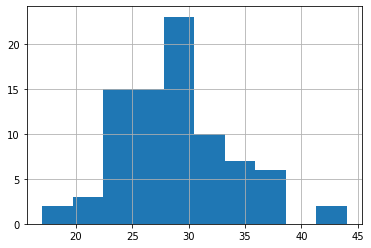

In [42]:
df_athletes['Age'].hist(label = 'Age');

In [69]:
print('Women athletes in CrossFit Games 2019:')
print('Mean values for strength marks selected by BMI range')
df_meanByStrength = pd.concat([df_BackSquat, df_CleanAndJerk,df_Snatch,df_DeadLift],axis=1)
df_meanByStrength

Women athletes in CrossFit Games 2019:
Mean values for strength marks selected by BMI range


,BackSquat_kg,CleanAndJerk_kg,Snatch_kg,DeadLift_kg
BMI range,,,,
"(20.999, 23.0]",121.0,86.0,68.0,138.0
"(23.0, 25.0]",119.0,89.0,70.0,141.0
"(25.0, 27.0]",126.0,96.0,81.0,152.0
"(27.0, 29.0]",132.0,98.0,81.0,159.0
"(29.0, 31.0]",127.0,98.0,83.0,159.0


In [70]:
print('Mean values for benchmarks wod-s selected by BMI range')
df_meanByBenchMark = pd.concat([df_FightGoneBad, df_MaxPullUps,df_Fran,df_Grace, df_Helen, df_Filthy50, df_Sprint400m],axis=1)
df_meanByBenchMark

Mean values for benchmarks wod-s selected by BMI range


,FightGoneBad,MaxPullUps,Fran,Grace,Helen,Filthy50,Sprint400m
BMI range,,,,,,,
"(20.999, 23.0]",370.0,38.0,2:49,2:02,9:54,17:04,1:20
"(23.0, 25.0]",353.0,46.0,2:59,2:00,8:42,23:42,1:12
"(25.0, 27.0]",374.0,44.0,3:00,2:10,10:12,21:16,1:17
"(27.0, 29.0]",420.0,43.0,3:34,2:11,11:26,20:40,1:44
"(29.0, 31.0]",369.0,32.0,3:10,2:01,11:08,--,--
